在这本篇中，我们将学习弱电解质的电离平衡常数的测定。对于此篇，我们需要用到matplotlib.pyplot、numpy和matplotlib等软件包。

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import rcParams
from scipy.interpolate import make_interp_spline
from scipy.optimize import curve_fit
np.set_printoptions(suppress=True)

import math
config = {
    "font.family":'serif',                   #设置字体家族
    "font.size": 12,                         #设置中文字体为宋体12号，英文字体为Times New Roman
    "mathtext.fontset":'stix',
    "font.serif": ['Times New Roman'],
}
rcParams.update(config)

定义一个computeCorrelation(X, Y)函数，计算线性回归中的相关性以及R$^{2}$，以此来判断线性拟合的相关程度。

In [8]:
def computeCorrelation(X, Y):
    xBar = np.mean(X)
    yBar = np.mean(Y)
    SSR = 0
    varX = 0
    varY = 0
    for i in range(0, len(X)):
        diffXXBar = X[i] - xBar
        diffYYBar = Y[i] - yBar
        SSR += (diffXXBar * diffYYBar)
        varX += diffXXBar ** 2
        varY += diffYYBar ** 2

    SST = math.sqrt(varX * varY)
    print("r：", SSR / SST, "r-squared：", (SSR / SST) ** 2)
    return

In [9]:
print(matplotlib.matplotlib_fname())
def runplt(size=None):
    plt.figure(figsize=(8,5))
    plt.title(r'The Figure of $\ \frac{c\Lambda_{m}}{c^{\ominus}}$ - $\frac{1}{\Lambda_{m}}$')
    plt.xlabel(r'$\frac{1}{\Lambda_{m}}\ $/ mol$\cdot \rm{S}^{-1}\cdot \rm{m}^{2}$')
    plt.ylabel(r'$\frac{c\Lambda_{m}}{c^{\ominus}}\ $/ $\rm{S}\cdot\rm{m}^{2}\cdot\rm{mol}^{-1}$')
    # plt.axis([0, 4.5,0.03, 0.07])
    # plt.axis([])
    return plt

c:\users\华硕\appdata\local\programs\python\python38\lib\site-packages\matplotlib\mpl-data\matplotlibrc


电解质溶液是指溶质溶于溶剂后全部或部分电离成离子后形成的溶液，电解质溶液是第二类导体，它依靠离子的定向迁移而导电。其导电能力用电导G衡量，为电阻R的倒数，量钢为S（Siemens，西门子）或Ω$^{-1}$，即
$$G = \frac{1}{R} = \frac{1}{ρ} \times \frac{A}{l} = κ\frac{A}{l}$$
$$κ = \frac{1}{ρ} = \frac{1}{R} \times \frac{l}{A} = G \times \frac{l}{A}$$
式中κ为电导率，S/m；ρ为电阻率，Ω•m；l为导体的长度，m；A为导体的截面积，m$^{2}$。
电解质溶液的电导率就是当电极间距离为1m，电极面积为1m$^{2}$时单位体积的溶液的电导。l/A是所使用的电导电极的常数，称为电导池常数,K$_{cell}$ = l/A，不便直接测量。可以先测量一个标准溶液的电阻，如KCl溶液，根据已知的电导率，从上式可以求出电导池常数。反之，根据待测溶液的电阻和电导池常数就可以求出待测溶液的电导率。
相距1m的两个平行板电极间放置含1mol电解质的溶液，其电导称为摩尔电导率ʌ$_{m}$。摩尔电导率和电导率的关系为
$$ʌ_{m} = \frac{κ}{c}$$
式中，c为电解质溶液的体积摩尔浓度，mol/m$^{3}$；ʌ$_{m}$为溶液的摩尔电导率，（S•m$^{2}$）/mol。因此，由已知浓度溶液的电导率，即可求出其摩尔电导率。
无限稀释时的摩尔电导率ʌ$_{m}^{∞}$是ʌ$_{m}$在浓度外推到零时的极限值，ʌ$_{m}^{∞}$反映的是全部电离并且离子间没有相互作用时的溶液的导电能力。对于强电解质，在任何浓度下都是全部电离的。对于弱电解质，在一定浓度下是部分电离的，并且电离度随浓度降低不断增加，在无限稀释时全部电离。弱电解质的ʌ$_{m}$反映的是部分电离的溶液的导电能力，如果弱电解质的电离度比较小，电离产生的离子浓度比较低，离子间相互作用可以忽略不计，那么ʌ$_{m}$与ʌ$_{m}^{∞}$的差别就可以近似看成是由部分电离与全部电离的离子数目不同所致，所以弱电解质的电离度$\alpha$可以表示为
$$\alpha = \frac{ʌ_{m}}{ʌ_{m}^{∞}}$$

输入实验数据，并处理实验数据。

In [10]:
c = [0.01,0.02,0.03,0.04,0.05]
c = np.array(c)
c = 1000*c

k = [156.1,224,276,320,357]
kh = 2.50/10000
k = np.array(k)
k = k/10000

lc = 390.72/10000
k = k-kh
l = k/c
y = c*l
y = y/1000
x = 1/l

图像的拟合函数：
 
2.657e-08 x - 1.867e-06
求导之后得到斜率：
 
2.657e-08
标准电离平衡常数为斜率除以无限稀薄摩尔电导率的平方：
 
1.741e-05


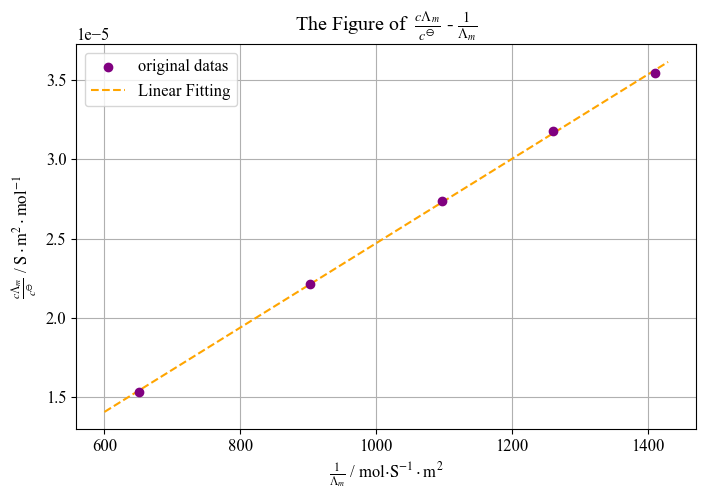

In [11]:
A = np.polyfit(x,y,1)
B = np.poly1d(A)
print('图像的拟合函数：')
print(B)
D = B.deriv()
print('求导之后得到斜率：')
print(D)
print('标准电离平衡常数为斜率除以无限稀薄摩尔电导率的平方：')
lc2 = lc*lc
D = D/lc2
print(D)

plt=runplt()
plt.grid(zorder=0)
plt.scatter(x,y,c='purple',marker='o',label='original datas',zorder=3)
c2 = np.linspace(600,1430,500)
s2 = make_interp_spline(x,B(x))(c2)
plt.plot(c2,s2,ls='--',c='orange',label=r'Linear Fitting',zorder=2)
plt.legend(loc='upper left')
plt.savefig('Map.pdf',bbox_inches='tight')
plt.show()